#Milhas por Galão (Miles per Gallon) 
Autor: Vinicius Fontes

OBJETIVO:  Criar um modelo de regressão linear múltipla que relacione o Consumo (MPG) dos veículos com os demais atributos. 

* Dataset Original: *https://archive.ics.uci.edu/ml/datasets/Auto+MPG*
* Dataset Usado: *https://tinyurl.com/y3xummdm*

Lista de Atributos:

* mpg: consumo (em milhas por galão) em ciclo urbano.
* cylinders: número de cilindros do motor (de 4 a 8).
* displacement: capacidade volumétrica do motor, em polegadas3.
* horsepower: potência do motor, em HP.
* weight: peso do veículo, em libras.
* acceleration: tempo (em s) gasto na aceleração de 0 a 60 mph.
* model year: ano inicial de fabricação (módulo 100).
* origin: origem do veículo.
* car name: identificação (única) do automóvel.




## Importando Bibliotecas

In [ ]:
#Instalação de Gerenciador de Pacotes
#Instala a bibilioteca
!pip install fuzzywuzzy

# Biliotecas de Métodos Necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fuzzywuzzy
from fuzzywuzzy import process
import seaborn as sns

# Bibliotecas de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importando Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/WILSON/Métodos não probabilísticos - Regressão Linear/Datasets/auto-mpg.csv', )
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Pré processamento

### Verificando os tipos dos atributos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


####Renomenado colunas

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
df = df.rename(columns={'model year':'model_year', 'car name':'car_name'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


####Verificando existência de valores nulos

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Após ocorrência da célula acima, é possível ver que há 6 instâncias com valores nulos no atributo 'horsepower'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
df.loc[df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


Instâncias que contém valores 'NaN'

####Subsituindo valores nulos pela média

In [ ]:
df.horsepower.mean()

104.46938775510205

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df.horsepower.mean())
df.loc[[32, 126, 330, 336, 354, 374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,104.469388,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,104.469388,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,104.469388,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.469388,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,104.469388,3035,20.5,82,1,amc concord dl


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

####Criando coluna 'brand'

À fim de entender se as marcas dos veículos tem influência no estudo, criei o atributo 'brand', extraindo os valores iniciais do atributo 'car_name'

In [ ]:
marca = df.car_name.str.split()

In [ ]:
n=0
marcas=[]
for i in marca:
  marcas.append(marca[n][0])
  n+=1

In [ ]:
df['brand'] = marcas
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford


In [ ]:
df.groupby('brand').brand.count()

brand
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: brand, dtype: int64

####Substituindo valores inconsistentes da coluna 'brand'

In [ ]:
def substitui_semelhantes(df, coluna, texto, semelhança = 47):
    """substitui as linhas de uma determinada coluna onde o valor possui semelhança maior que o informado"""
    # lista de valores únicos
    strings = df[coluna].unique()
    
    # 10 valores mais semelhantes ao texto
    parecidos = fuzzywuzzy.process.extract(texto, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
 
    # seleciona apenas os parecidos com semelhança > "semelhança"
    mais_parecidos = [parecidos[0] for parecidos in parecidos if parecidos[1] >= semelhança]
 
    # pega a linha dos mais_parecidos
    linha_parecidos = df[coluna].isin(mais_parecidos)
 
    # substitui pelo valor do texto 
    df.loc[linha_parecidos, coluna] = texto

In [ ]:
substitui_semelhantes(df, 'brand', 'chevrolet')
substitui_semelhantes(df, 'brand', 'toyota')
substitui_semelhantes(df, 'brand', 'mazda')
substitui_semelhantes(df, 'brand', 'volkswagen')
substitui_semelhantes(df, 'brand', 'mercedes-benz')
df.brand.replace('vw','volkswagen',inplace=True)

In [ ]:
df.brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'mazda', 'volvo', 'renault', 'honda', 'subaru', 'capri',
       'mercedes-benz', 'cadillac', 'triumph', 'nissan'], dtype=object)

### Utilizando Label Encodering para o atributo 'brand'

In [ ]:
Brand = df.brand.values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
valores_numericos = label_encoder.fit_transform(Brand)
df['brand'] = valores_numericos
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,6
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,20
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,10


## Análise da existência de correlações entre os atributos

### Correlação linear - Coeficiente de Pearson

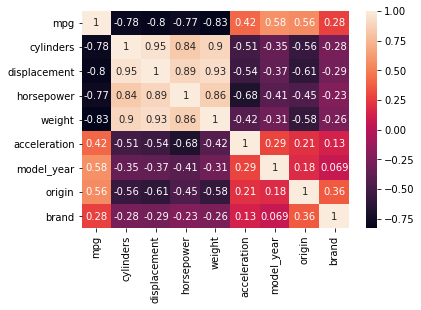

In [ ]:
var_corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)

Observando a matriz de correlação, conseugimos enxergar que há correlação negativa significativas entre o atributos 'mpg' e 'cylinders', 'displacement', 'horsepower', 'weight'. Já entre 'mpg' e atributos 'model_year' e 'origin' há correlação positiva considerável.

### Gráficos de dispersão

À fim de visualizar graficamente estas relações, abaixo segue um conjunto de gráfico de disperções entre 'mpg' e atibutos que há correlações consideráveis.

Gráfico de dispersão entre MPG x Cilindradas

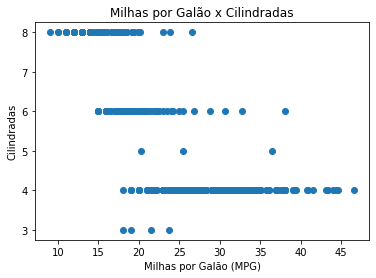

In [ ]:
plt.scatter(df.mpg, df.cylinders)
plt.xlabel('Milhas por Galão (MPG)')
plt.ylabel('Cilindradas')
plt.title('Milhas por Galão x Cilindradas')
plt.show()

Gráfico de dispersão entre MPG x Capacidade volumétrica do motor (Displacement)

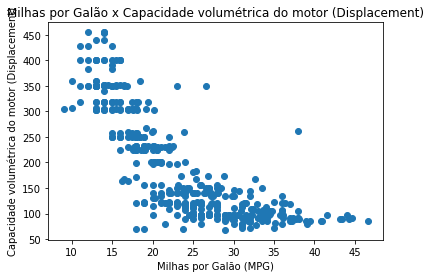

In [ ]:
plt.scatter(df.mpg, df.displacement)
plt.xlabel('Milhas por Galão (MPG)')
plt.ylabel('Capacidade volumétrica do motor (Displacement)')
plt.title('Milhas por Galão x Capacidade volumétrica do motor (Displacement)')
plt.show()

Gráfico de dispersão entre MPG x HP

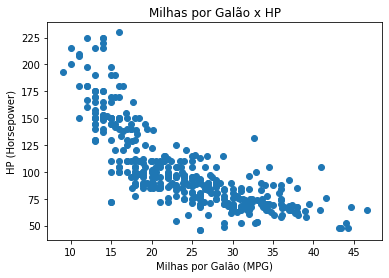

In [ ]:
plt.scatter(df.mpg, df.horsepower)
plt.xlabel('Milhas por Galão (MPG)')
plt.ylabel('HP (Horsepower)')
plt.title('Milhas por Galão x HP')
plt.show()

Gráfico de dispersão entre MPG x Peso

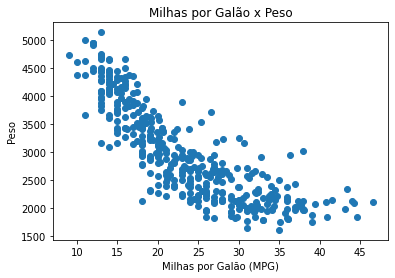

In [ ]:
plt.scatter(df.mpg, df.weight)
plt.xlabel('Milhas por Galão (MPG)')
plt.ylabel('Peso')
plt.title('Milhas por Galão x Peso')
plt.show()

Gráfico de dispersão entre MPG x Ano do modelo

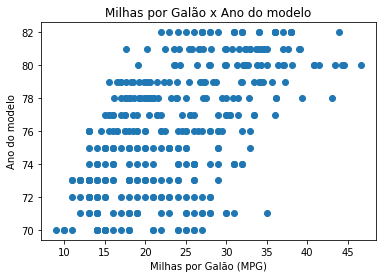

In [ ]:
plt.scatter(df.mpg, df.model_year)
plt.xlabel('Milhas por Galão (MPG)')
plt.ylabel('Ano do modelo')
plt.title('Milhas por Galão x Ano do modelo')
plt.show()

#### Gráfico de dispersão entre MPG x Origem do veículo

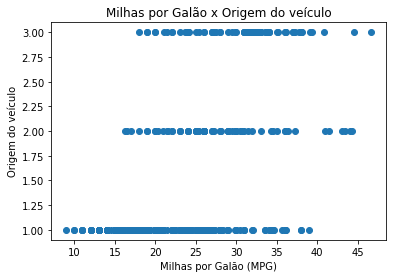

In [ ]:
plt.scatter(df.mpg, df.origin)
plt.xlabel('Milhas por Galão (MPG)')
plt.ylabel('Origem do veículo')
plt.title('Milhas por Galão x Origem do veículo')
plt.show()

## Regressão Linear Múltipla

### Selecionando variáveis para o treinamento dos Modelos

In [ ]:
X1 = df[['cylinders','displacement','horsepower','weight','model_year','origin']]
X2 = df[['weight','model_year','origin']]
X3 = df[['cylinders','displacement','horsepower']]
X4 = df[['displacement','weight','origin']]
y = df.mpg

In [ ]:
print('Dimensões de X1',X1.shape)
print('Dimensões de X2',X2.shape)
print('Dimensões de X3',X3.shape)
print('Dimensões de X4',X4.shape)
print('Dimensões de y',y.shape)

Dimensões de X1 (398, 6)
Dimensões de X2 (398, 3)
Dimensões de X3 (398, 3)
Dimensões de X4 (398, 3)
Dimensões de y (398,)


### Normalização dos valores de X de entrada

In [ ]:
escalonador = StandardScaler()
escalonador.fit(X1)      
X1_Norm = escalonador.transform(X1)

escalonador = StandardScaler()
escalonador.fit(X2)
X2_Norm = escalonador.transform(X2)

escalonador = StandardScaler()
escalonador.fit(X3)
X3_Norm = escalonador.transform(X3)

escalonador = StandardScaler()
escalonador.fit(X4)
X4_Norm = escalonador.transform(X4)

### Separando dados de treino e teste

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_Norm, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_Norm, y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_Norm, y)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4_Norm, y)

### Treinando Modelos de Regressão Linear Múltipla

In [ ]:
reglin1 = LinearRegression()
reglin1.fit(X_train1,y_train1)

reglin2 = LinearRegression()
reglin2.fit(X_train2,y_train2)

reglin3 = LinearRegression()
reglin3.fit(X_train3,y_train3)

reglin4 = LinearRegression()
reglin4.fit(X_train4,y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Valores dos coeficientes do Modelo

In [ ]:
print('======>MODELO 1')
print('Coeficiente Lienar: ', reglin1.intercept_)
print('Coeficientes angulares: ', reglin1.coef_)

print('\n======>MODELO 2')
print('Coeficiente Lienar: ', reglin2.intercept_)
print('Coeficientes angulares: ', reglin2.coef_)

print('\n======>MODELO 3')
print('Coeficiente Lienar: ', reglin3.intercept_)
print('Coeficientes angulares: ', reglin3.coef_)

print('\n======>MODELO 4')
print('Coeficiente Lienar: ', reglin4.intercept_)
print('Coeficientes angulares: ', reglin4.coef_)

======>MODELO 1
Coeficiente Lienar:  23.41345587207768
Coeficientes angulares:  [-0.83935123  2.01138122 -0.8114829  -5.44506772  2.60500909  1.2447885 ]

======>MODELO 2
Coeficiente Lienar:  23.495014796622446
Coeficientes angulares:  [-4.95174708  2.76820621  1.15097527]

======>MODELO 3
Coeficiente Lienar:  23.430013413630682
Coeficientes angulares:  [-1.5404118  -3.0199319  -2.20419559]

======>MODELO 4
Coeficiente Lienar:  23.53121046921001
Coeficientes angulares:  [-0.88640049 -5.19429235  0.84396028]


### Previsões dos Modelos de Regressão Linear Múltipla

In [ ]:
y_pred1 = reglin1.predict(X_test1)
y_pred2 = reglin2.predict(X_test2)
y_pred3 = reglin3.predict(X_test3)
y_pred4 = reglin4.predict(X_test4)

### Métricas de Qualidade dos Modelos

In [ ]:
# COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TREINO
print('======> COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TREINO')
print('R2 do Modelo 1: %.4f'%reglin1.score(X_train1,y_train1))
print('R2 do Modelo 2: %.4f'%reglin2.score(X_train2,y_train2))
print('R2 do Modelo 3: %.4f'%reglin3.score(X_train3,y_train3))
print('R2 do Modelo 4: %.4f'%reglin4.score(X_train4,y_train4))
print('\n')

# COEFICIENTE DE DETERMINAÇÃO (R2) AJUSTADO OS MODELOS PARA DADOS DE TREINO
print('======> COEFICIENTE DE DETERMINAÇÃO (R2) AJUSTADO DOS MODELOS PARA DADOS DE TREINO')
n = len(y)
k1 = X_train1.shape[1]
R21ajust = 1-((n-1)/(n-k1-1))*(1-reglin1.score(X_train1,y_train1))
print("R2 ajustado do Modelo 1 :%.4f"%R21ajust)

k2 = X_train2.shape[1]
R22ajust = 1-((n-1)/(n-k2-1))*(1-reglin2.score(X_train2,y_train2))
print("R2 ajustado do Modelo 2 :%.4f"%R22ajust)

k3 = X_train3.shape[1]
R23ajust = 1-((n-1)/(n-k3-1))*(1-reglin3.score(X_train3,y_train3))
print("R2 ajustado do Modelo 3 :%.4f"%R23ajust)

k4 = X_train4.shape[1]
R24ajust = 1-((n-1)/(n-k4-1))*(1-reglin4.score(X_train4,y_train4))
print("R2 ajustado do Modelo 4 :%.4f"%R24ajust)
print('\n')

# COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TESTE
print('======> COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TESTE')
print('R2 do Modelo 1: %.4f'%reglin1.score(X_test1,y_test1))
print('R2 do Modelo 2: %.4f'%reglin2.score(X_test2,y_test2))
print('R2 do Modelo 3: %.4f'%reglin3.score(X_test3,y_test3))
print('R2 do Modelo 4: %.4f'%reglin4.score(X_test4,y_test4))
print('\n')

# COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TESTE
print('======> COEFICIENTE DE DETERMINAÇÃO (R2) AJUSTADO DOS MODELOS PARA DADOS DE TESTE')
n = len(y)
k1 = X_test1.shape[1]
R21ajust = 1-((n-1)/(n-k1-1))*(1-reglin1.score(X_test1,y_test1))
print("R2 ajustado do Modelo 1 :%.4f"%R21ajust)

k2 = X_test2.shape[1]
R22ajust = 1-((n-1)/(n-k2-1))*(1-reglin2.score(X_test2,y_test2))
print("R2 ajustado do Modelo 2 :%.4f"%R22ajust)

k3 = X_test3.shape[1]
R23ajust = 1-((n-1)/(n-k3-1))*(1-reglin3.score(X_test3,y_test3))
print("R2 ajustado do Modelo 3 :%.4f"%R23ajust)

k4 = X_test4.shape[1]
R24ajust = 1-((n-1)/(n-k4-1))*(1-reglin4.score(X_test4,y_test4))
print("R2 ajustado do Modelo 4 :%.4f"%R24ajust)
print('\n')

# ERRO MÉDIO QUADRÁTICO (RMSE) DOS MODELOS
print('======> ERRO MÉDIO QUADRÁTICO (RMSE) DOS MODELOS')
print( 'RMSE do Modelo 1: %.2f' % mean_squared_error(y_test1, y_pred1))
print( 'RMSE do Modelo 2: %.2f' % mean_squared_error(y_test2, y_pred2))
print( 'RMSE do Modelo 3: %.2f' % mean_squared_error(y_test3, y_pred3))
print( 'RMSE do Modelo 4: %.2f' % mean_squared_error(y_test4, y_pred4))


======> COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TREINO
R2 do Modelo 1: 0.8151
R2 do Modelo 2: 0.8236
R2 do Modelo 3: 0.6563
R2 do Modelo 4: 0.7202


======> COEFICIENTE DE DETERMINAÇÃO (R2) AJUSTADO DOS MODELOS PARA DADOS DE TREINO
R2 ajustado do Modelo 1 :0.8123
R2 ajustado do Modelo 2 :0.8223
R2 ajustado do Modelo 3 :0.6537
R2 ajustado do Modelo 4 :0.7181


======> COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TESTE
R2 do Modelo 1: 0.8329
R2 do Modelo 2: 0.7973
R2 do Modelo 3: 0.6791
R2 do Modelo 4: 0.6569


======> COEFICIENTE DE DETERMINAÇÃO (R2) DOS MODELOS PARA DADOS DE TESTE
R2 ajustado do Modelo 1 :0.8304
R2 ajustado do Modelo 2 :0.7958
R2 ajustado do Modelo 3 :0.6766
R2 ajustado do Modelo 4 :0.6543


======> ERRO MÉDIO QUADRÁTICO (RMSE) DOS MODELOS
RMSE do Modelo 1: 10.16
RMSE do Modelo 2: 12.74
RMSE do Modelo 3: 17.90
RMSE do Modelo 4: 20.74


### Validação Cruzada - K-fold

In [ ]:
valCru1 = cross_val_score(reglin1,X_test1,y_test1, cv =10, scoring='neg_root_mean_squared_error')
m1=np.mean(-valCru1)
dp1=np.std(-valCru1,ddof=1)

valCru2 = cross_val_score(reglin2,X_test2,y_test2, cv =10, scoring='neg_root_mean_squared_error')
m2=np.mean(-valCru2)
dp2=np.std(-valCru2,ddof=1)

valCru3 = cross_val_score(reglin3,X_test3,y_test3, cv =10, scoring='neg_root_mean_squared_error')
m3=np.mean(-valCru3)
dp3=np.std(-valCru3,ddof=1)

valCru4 = cross_val_score(reglin4,X_test4,y_test4, cv =10, scoring='neg_root_mean_squared_error')
m4=np.mean(-valCru4)
dp4=np.std(-valCru4,ddof=1)

print('\nRMSE médio do Modelo 1: %.4f'%m1)
print('Desvio Padrão entre os RMSE do Modelo 1: %.4f'%dp1)
print('Variação Percentual do RMSE do Modelo 1: %.4f'%(100*dp1/m1))

print('\nRMSE médio do Modelo 2: %.4f'%m2)
print('Desvio Padrão entre os RMSE do Modelo 2: %.4f'%dp2)
print('Variação Percentual do RMSE do Modelo 2: %.4f'%(100*dp2/m2))

print('\nRMSE médio do Modelo 3: %.4f'%m3)
print('Desvio Padrão entre os RMSE do Modelo 3: %.4f'%dp3)
print('Variação Percentual do RMSE do Modelo 3: %.4f'%(100*dp3/m3))

print('\nRMSE médio do Modelo 4: %.4f'%m4)
print('Desvio Padrão entre os RMSE do Modelo 4: %.4f'%dp4)
print('Variação Percentual do RMSE do Modelo 4: %.4f'%(100*dp3/m4))


RMSE médio do Modelo 1: 3.1690
Desvio Padrão entre os RMSE do Modelo 1: 0.9988
Variação Percentual do RMSE do Modelo 1: 31.5181

RMSE médio do Modelo 2: 3.5391
Desvio Padrão entre os RMSE do Modelo 2: 0.9385
Variação Percentual do RMSE do Modelo 2: 26.5173

RMSE médio do Modelo 3: 4.3598
Desvio Padrão entre os RMSE do Modelo 3: 0.9554
Variação Percentual do RMSE do Modelo 3: 21.9129

RMSE médio do Modelo 4: 4.5496
Desvio Padrão entre os RMSE do Modelo 4: 1.3489
Variação Percentual do RMSE do Modelo 4: 20.9988


### Visualização Gráfica dos Modelos

Modelo 1

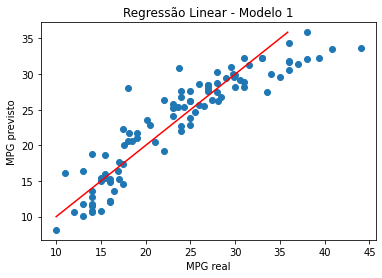

In [ ]:
# Modelo 1
plt.scatter(y_test1, y_pred1)
range = [y_test1.min(), y_pred1.max()]
plt.plot(range, range, 'red')
plt.title('Regressão Linear - Modelo 1')
plt.xlabel('MPG real')
plt.ylabel('MPG predito')
plt.show()

Modelo 2

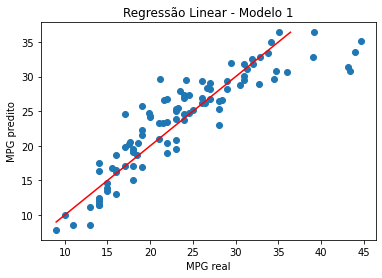

In [ ]:
# Modelo 1
plt.scatter(y_test2, y_pred2)
range = [y_test2.min(), y_pred2.max()]
plt.plot(range, range, 'red')
plt.title('Regressão Linear - Modelo 1')
plt.xlabel('MPG real')
plt.ylabel('MPG predito')
plt.show()

Modelo 3

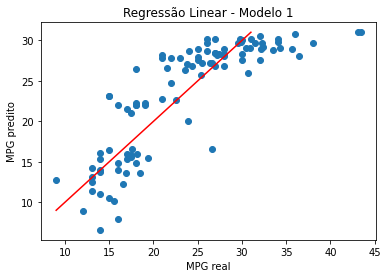

In [ ]:
# Modelo 3
plt.scatter(y_test3, y_pred3)
range = [y_test3.min(), y_pred3.max()]
plt.plot(range, range, 'red')
plt.title('Regressão Linear - Modelo 1')
plt.xlabel('MPG real')
plt.ylabel('MPG predito')
plt.show()

Modelo 4

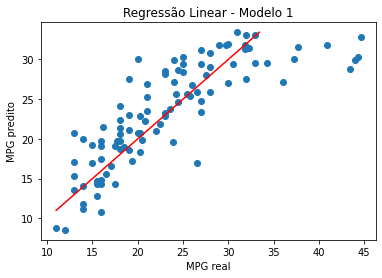

In [ ]:
# Modelo 4
plt.scatter(y_test4, y_pred4)
range = [y_test4.min(), y_pred4.max()]
plt.plot(range, range, 'red')
plt.title('Regressão Linear - Modelo 1')
plt.xlabel('MPG real')
plt.ylabel('MPG predito')
plt.show()

## Conclusão

Após análise sobre a existência de Correlação Linear entre as variáveis independentes e dependente do estudo, elaborei 4 modelos distintos para encontrar qual deles teria maior poder de generalização sobre dados não conhecido do sistema. Durante visualização das métricas de Qualidade R2 e RMSE o MODELO 1 resultado com os melhores valores para dados desconhecidos no sistema. 

*   R2 ajustado do Modelo 1: 83,04%
*   RMSE médio do Modelo 1: 3,16

**Portanto o MODELO 1 é o melhor para este estudo:
f(x) = -0,8393.x1 + 2,0114.x2 -0,8115.x3 -5.4451.x4 +2.6050.x5 +1.2448.x6 + 23.4135**

**E os principais atributos que ajudam nesta generalização são:**

* **cylinders: número de cilindros do motor**
* **displacement: capacidade volumétrica do motor, em polegadas3**
* **horsepower: potência do motor, em HP.**
* **weight: peso do veículo, em libras.**
* **model year: ano inicial de fabricação.**
* **origin: origem do veículo.**